<a href="https://colab.research.google.com/github/sillyme19/sentimental-analysis/blob/main/sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/datasets/train.csv',encoding='latin-1')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [ ]:
# Remove special characters and punctuation
data['text'] = data['text'].astype(str).apply(lambda x: x.replace(r'[^a-zA-Z0-9\s]', ''))
# Convert the text data to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())




# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])

# Pad the sequences to have the same length
max_length = 200
padded_sequences = pad_sequences(sequences, maxlen=max_length)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['sentiment'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LabelEncoder().fit(y_train)
LabelEncoder().fit(y_test)
y_train_int = LabelEncoder().fit_transform(y_train)
y_test_int = LabelEncoder().fit_transform(y_test)

In [ ]:
# Convert the sentiment labels to categorical labels
y_train = to_categorical(y_train_int)
y_test = to_categorical(y_test_int)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_length))
model.add(LSTM(64, dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
687/687 [==============================] - 113s 159ms/step - loss: 0.8071 - accuracy: 0.6325 - val_loss: 0.7100 - val_accuracy: 0.6966
Epoch 2/10
687/687 [==============================] - 108s 157ms/step - loss: 0.5981 - accuracy: 0.7571 - val_loss: 0.6569 - val_accuracy: 0.7300
Epoch 3/10
687/687 [==============================] - 109s 159ms/step - loss: 0.5144 - accuracy: 0.7953 - val_loss: 0.6802 - val_accuracy: 0.7302
Epoch 4/10
687/687 [==============================] - 110s 160ms/step - loss: 0.4457 - accuracy: 0.8250 - val_loss: 0.7645 - val_accuracy: 0.7171
Epoch 5/10
687/687 [==============================] - 109s 159ms/step - loss: 0.3821 - accuracy: 0.8494 - val_loss: 0.7848 - val_accuracy: 0.7133
Epoch 6/10
687/687 [==============================] - 110s 160ms/step - loss: 0.3231 - accuracy: 0.8744 - val_loss: 0.9086 - val_accuracy: 0.7042
Epoch 7/10
687/687 [==============================] - 108s 157ms/step - loss: 0.2761 - accuracy: 0.8932 - val_loss: 1.0582 -

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.3f}')

# Print the classification report and confusion matrix
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

172/172 [==============================] - 8s 46ms/step - loss: 1.4196 - accuracy: 0.6946
Test accuracy: 0.695
172/172 [==============================] - 6s 32ms/step
              precision    recall  f1-score   support

           0       0.69      0.66      0.67      1562
           1       0.65      0.70      0.68      2230
           2       0.76      0.72      0.74      1705

    accuracy                           0.69      5497
   macro avg       0.70      0.69      0.70      5497
weighted avg       0.70      0.69      0.70      5497

[[1034  435   93]
 [ 386 1561  283]
 [  84  398 1223]]


In [ ]:
# Use the model for sentiment analysis
def sentiment_analysis(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length)
    prediction = model.predict(padded_sequence)
    sentiment = np.argmax(prediction, axis=1)
    return sentiment

# Test the sentiment analysis function
text = 'I love this product!'
sentiment = sentiment_analysis(text)
print(f'Sentiment: {sentiment}')

1/1 [==============================] - 0s 31ms/step
Sentiment: [2]


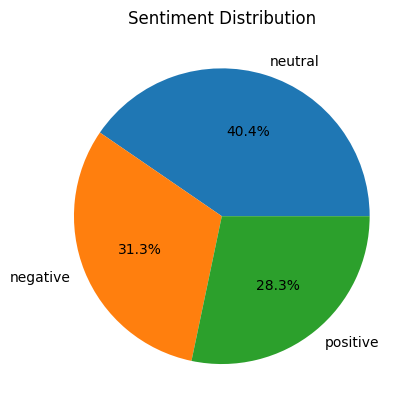

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the count of each sentiment
# Convert the NumPy array to a Pandas Series to use value_counts()
sentiment_counts =pd.Series( y_train_int).value_counts()

plt.pie(sentiment_counts.values, labels=data['sentiment'].unique(), autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
data['sentiment'].value_counts()

sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64

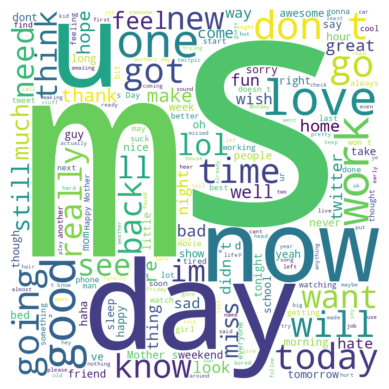

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud=''.join(str(item) for item in data['selected_text'])
wordcloud = WordCloud(width=800, height=800,background_color='white').generate(cloud)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()